# Óbitos por COVID-19 Brasil

Author: P. H. P. Cintra

Website: [https://sites.google.com/view/pedrocintra](https://sites.google.com/view/pedrocintra)

Twitter/Instagram: [@pedrocintra52](https://www.instagram.com/pedrocintra52)

$$\hspace{1cm}$$

Bem vindo/Bem vinda/Bem vinde, neste jupyter notebook encontra-se o código utilizado por mim para estimar o número mais próximo do real de óbitos por COVID-19 no Brasil. Para isso, utilizo os dados do portal [Bigdata-covid19](https://bigdata-covid19.icict.fiocruz.br/) da Fiocruz e os dados do [OurWorldInData](https://ourworldindata.org/coronavirus). Utilizando a comparação entre óbitos por síndrome respiratória aguda grave (SRAG) nos anos de 2018 e 2019, e o ano de 2020, eu estimo o real numero de óbitos por COVID-19 no final de 2020/início de 2021. Com esta estiamtiva, eu estimo qual a % de subnotificação de mortes no Brasil e finalmente, utilizo os dados atuais de mortes registradas para estimar qual o numero real de mortos por COVID-19 no Brasil. Alguns pontos devem ser discutidos antes disso:

1. Ao comparar os anos anteriores de 2018/2019 com 2020, verei o quanto o ano de 2020 está em excesso comparado à média dos anteriores. Entretanto, pode-se argumentar que o ano de 2020 pode ter tido mais casos de doenças respiratórias, alem da COVID, o que naturalmente aumentaria o registro de óbitos por SRAG naturalmente. O problema deste argumento é que, devido ao isolamento social, a tendência é que os casos de SRAG causados por outros agentes infecciosos (como o Influenza, que causa a gripe) diminua. Porém, para evitar este possível viés, irei comparar o excesso de 2020 com a média de 2018/2019 e a margem de 95% CI, para eliminar melhor a possibilidade de que este excesso esteja contaminando a estiamtiva com óbitos de SRAG que não foram de COVID.
2. Após encontrar a % de subnotificação de mortes, eu suponho que este valor não se altere até os dias atuais,veremos que a % de subnotificação tendeu a aumentar no ano de 2020, mas se estabilizou nas últimas 20 semanas epidemiológicas, indicando que esta suposição é válida.
3. A análise que farei consta com dados baixados no dia 06/03/2021, sinta-se livre para acessar os links mencionados anteriormente e baixar os dados mais recentes do [OurWorldInData](https://ourworldindata.org/coronavirus) e do [Bigdata-covid19](https://bigdata-covid19.icict.fiocruz.br/) para fazer uma estimativa mais recente.

In [1]:
# Importando bibliotecas
import pandas as pd # Para importar arquivos e dados
import numpy as np # Funções e conceitos matemáticos
import matplotlib.pyplot as plt # Gráficos
import scipy.stats as st #statistical functions

In [2]:
# Importando os dados do repositório no GitHub
fiocruz = pd.read_csv('https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/master/fiocruz_sivep_gripe.csv')
owid = pd.read_csv('https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/master/owid-covid-data.csv')

In [3]:
fiocruz.head()

,Semana epidemiológicaobito 2018,SRAG: óbitosobito 2018,Semana epidemiológicaobito 2019,SRAG: óbitosobito 2019,Semana epidemiológicaobito 2020,SRAG: óbitosobito 2020,Semana epidemiológicaobitocovid 2020,SRAG: óbitosobitocovid 2020,Semana epidemiológicaobitocovid 2021,SRAG: óbitosobitocovid 2021,Semana epidemiológicaÓbitos MS,SRAG: óbitosÓbitos MS
0,1.0,49.0,1.0,44.0,1,82,1,0,1.0,6009.0,1,6906
1,2.0,91.0,2.0,85.0,2,167,2,0,2.0,11589.0,2,13571
2,3.0,127.0,3.0,130.0,3,253,3,0,3.0,16155.0,3,20720
3,4.0,160.0,4.0,172.0,4,336,4,0,4.0,19775.0,4,28220
4,5.0,197.0,5.0,209.0,5,442,5,0,5.0,23282.0,5,35287


In [4]:
# Media e desvio padrão de 2019 e 2018
mean_early_years = np.mean([np.array(fiocruz['SRAG: óbitosobito 2018']),
                            np.array(fiocruz['SRAG: óbitosobito 2019'])], axis = 0)
std_early_years = np.std([np.array(fiocruz['SRAG: óbitosobito 2018']),
                          np.array(fiocruz['SRAG: óbitosobito 2019'])], axis=0)

In [5]:
# Dataframe com as médias e desvios padrões
stats = pd.DataFrame({'Semana epidemiológica': [i+1 for i in range(53)],
                     'SRAG: obito media': mean_early_years,
                     'SRAG: obito std': std_early_years})

In [6]:
# Calculo dos intervalos de confiança
low95, up95 = st.t.interval(alpha=0.95, df=2,
            loc=stats['SRAG: obito media'],
            scale=stats['SRAG: obito std'])

/home/pedroc/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1976: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


In [7]:
stats['95% CI lower'] = low95
stats['95% CI upper'] = up95

In [8]:
stats

,Semana epidemiológica,SRAG: obito media,SRAG: obito std,95% CI lower,95% CI upper
0,1,46.5,2.5,35.743368,57.256632
1,2,88.0,3.0,75.092042,100.907958
2,3,128.5,1.5,122.046021,134.953979
3,4,166.0,6.0,140.184084,191.815916
4,5,203.0,6.0,177.184084,228.815916
5,6,242.0,8.0,207.578778,276.421222
6,7,288.0,20.0,201.946945,374.053055
7,8,343.5,36.5,186.453175,500.546825
8,9,403.0,40.0,230.893891,575.106109
9,10,470.0,50.0,254.867364,685.132636


/home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


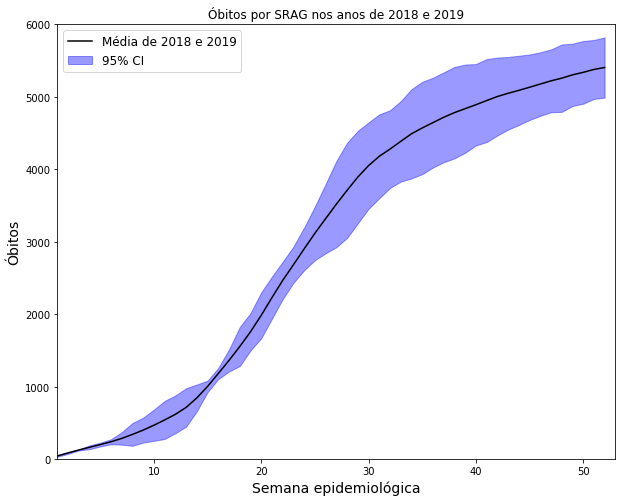

In [9]:
# Comportamento médio de 2019 e 2018
plt.figure(figsize=(10,8))
plt.plot(np.array(stats['Semana epidemiológica']), stats['SRAG: obito media'],
        color = 'black', label = 'Média de 2018 e 2019')
plt.fill_between(np.array(stats['Semana epidemiológica']), stats['95% CI lower'], 
                stats['95% CI upper'], alpha = 0.4, color = 'blue', label = r'95% CI')
#plt.fill_between(np.array(stats['Semana epidemiológica']), stats['99.7% CI lower'], 
#               stats['99.7% CI upper'], alpha = 0.3, color = 'blue', label = r'99.7% CI')
plt.legend(loc='upper left', fontsize = 12)
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('Óbitos', fontsize = 14)
plt.xlim(1, 53)
plt.ylim(0, 6000)
plt.title('Óbitos por SRAG nos anos de 2018 e 2019')
plt.savefig('/home/pedroc/Documentos/pedro/Coronavirus/Graficos/SRAG_2018_2019.png',
            bbox_inches = 'tight', dpi = 300)

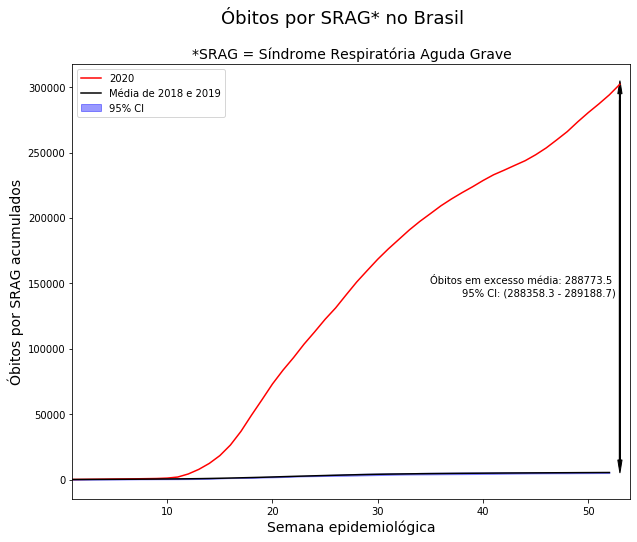

In [10]:
# 2020
plt.figure(figsize=(10,8))
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2020']), np.array(fiocruz['SRAG: óbitosobito 2020']),
        color = 'red', label = '2020')
plt.plot(np.array(stats['Semana epidemiológica']), stats['SRAG: obito media'],
        color = 'black', label = 'Média de 2018 e 2019')
plt.fill_between(np.array(stats['Semana epidemiológica']), stats['95% CI lower'], 
                stats['95% CI upper'], alpha = 0.4, color = 'blue', label = r'95% CI')
plt.legend(loc='upper left')
plt.xlim(1, 54)
plt.arrow(53, 10000, 0, 285000, width = 0.1, head_width = 0.4, head_length = 10000, color = 'black')
plt.arrow(53, 290000, 0, -275000, width = 0.1, head_width = 0.4, head_length = 10000, color = 'black')
plt.text(35, 150000, f"Óbitos em excesso média: {np.array(fiocruz['SRAG: óbitosobito 2020'])[-2] - np.array(stats['SRAG: obito media'])[-2]}")
plt.text(38, 140000,
         f"95% CI: ({(np.array(fiocruz['SRAG: óbitosobito 2020'])[-2] - np.array(stats['95% CI upper'])[-2]):.1f} - {(np.array(fiocruz['SRAG: óbitosobito 2020'])[-2] - np.array(stats['95% CI lower'])[-2]):.1f})")
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('Óbitos por SRAG acumulados', fontsize = 14)
plt.suptitle('Óbitos por SRAG* no Brasil', fontsize = 18)
plt.title('*SRAG = Síndrome Respiratória Aguda Grave', fontsize = 14)
plt.savefig('/home/pedroc/Documentos/pedro/Coronavirus/Graficos/SRAG_2020.png',
            bbox_inches = 'tight', dpi = 300)

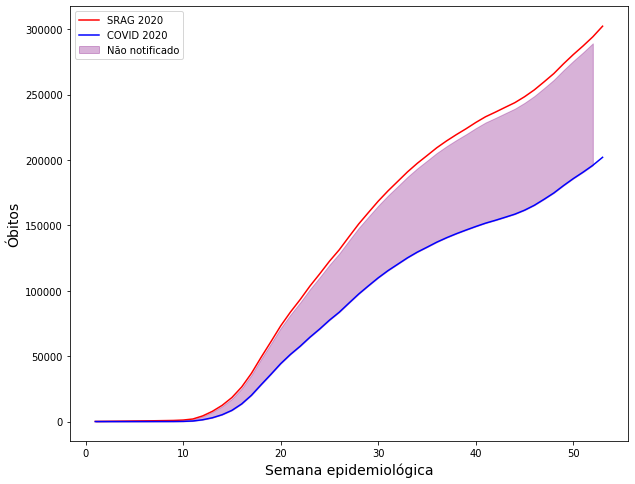

In [11]:
# Diferença entre óbito registrado como COVID e óbito de SRAG total com a subnotificação estimada
plt.figure(figsize=(10,8))
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2020']), np.array(fiocruz['SRAG: óbitosobito 2020']),
        color = 'red', label = 'SRAG 2020')
plt.plot(np.array(fiocruz['Semana epidemiológicaobitocovid 2020']), np.array(fiocruz['SRAG: óbitosobitocovid 2020']),
        color = 'blue', label = 'COVID 2020')
plt.fill_between(fiocruz['Semana epidemiológicaobito 2020'], np.array(fiocruz['SRAG: óbitosobitocovid 2020']),
                np.array(fiocruz['SRAG: óbitosobito 2020'])-np.array(stats['95% CI lower']), color = 'purple', alpha = 0.3, label = 'Não notificado')
plt.legend(loc = 'upper left')
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('Óbitos', fontsize = 14)
plt.savefig('/home/pedroc/Documentos/pedro/Coronavirus/Graficos/SRAG_covid_2020.png',
            bbox_inches = 'tight', dpi = 300)

In [12]:
# Calculo da subnotificação durante o período de 2020
subnotification = np.array(fiocruz['SRAG: óbitosobitocovid 2020'])/(np.array(fiocruz['SRAG: óbitosobito 2020']) - mean_early_years)
subnotification_low = np.array(fiocruz['SRAG: óbitosobitocovid 2020'])/(np.array(fiocruz['SRAG: óbitosobito 2020']) - np.array(stats['95% CI lower']))
subnotification_up = np.array(fiocruz['SRAG: óbitosobitocovid 2020'])/(np.array(fiocruz['SRAG: óbitosobito 2020']) - np.array(stats['95% CI upper']))

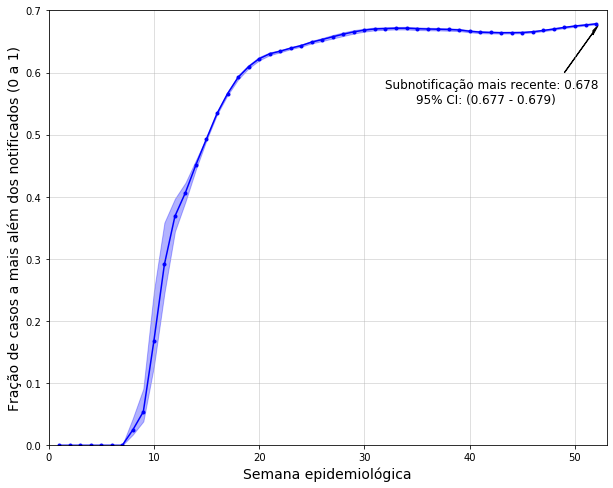

In [13]:
# Andamento da subnotificação durante 2020
plt.figure(figsize=(10,8))
plt.grid(True, alpha = 0.5)
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2020']), subnotification,
         linewidth = 1.5, color = 'blue')
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2020']), subnotification, 'b.')
plt.fill_between(np.array(fiocruz['Semana epidemiológicaobito 2020']), subnotification_low,
                subnotification_up, color = 'blue', alpha = 0.3)
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('Fração de casos a mais além dos notificados (0 a 1)', fontsize = 14)
plt.xlim(0, 53)
plt.ylim(0, 0.7)
plt.arrow(49, 0.6, 2.7, 0.064, head_width = 0.007, head_length = 0.5, color = 'black')
plt.text(32, 0.55, f'Subnotificação mais recente: {subnotification[-2]:.3f}'
         '\n'
         f'        95% CI: ({subnotification_low[-2]:.3f} - {subnotification_up[-2]:.3f})', fontsize = 12)
plt.savefig('/home/pedroc/Documentos/pedro/Coronavirus/Graficos/Subnotification_covid.png',
            bbox_inches = 'tight', dpi = 300)

In [14]:
# Valor mais recente de subnotificação
subnotification_recent = subnotification[-2]
subnotification_recent_low = subnotification_low[-2]
subnotification_recent_up = subnotification_up[-2]

In [15]:
print(f'Subnotificação equivalente a {100*subnotification_recent:.2f} (95% CI: {100*subnotification_recent_low:.2f} - {100*subnotification_up[-2]:.2f}%) do registrado')

Subnotificação equivalente a 67.84 (95% CI: 67.75 - 67.94%) do registrado


In [16]:
# Valor mais recente de mortes no Brasil
Brasil = owid[owid['location'] == 'Brazil']
last_register = np.array(Brasil['total_deaths'])[-1]

In [17]:
# Estimativa do valor mais realístico de mortes no Brasil
actual_deaths = (1+subnotification_recent)*last_register
actual_deaths_low = (1+subnotification_recent_low)*last_register
actual_deaths_up = (1+subnotification_recent_up)*last_register

In [18]:
print(f'Numero mais realístico de mortos por COVID-19 no Brasil até o momento: {int(actual_deaths)} (95% CI: {int(actual_deaths_low)} - {int(actual_deaths_up)})')

Numero mais realístico de mortos por COVID-19 no Brasil até o momento: 438022 (95% CI: 437768 - 438277)
